In [1]:
# 1. Загрузить файл hr.csv



In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)



In [5]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
def salary_int (line):
    if line == 'low':
        salary_ = 0.33
    elif line =='medium':
        salary_ = 0.66
    elif line == 'high':
        salary_ = 1.00
    return salary_

In [7]:
data['wages'] = data['salary'].apply(salary_int)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,wages
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.33
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.66
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.66
3,0.72,0.87,5,223,5,0,1,0,sales,low,0.33
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.33


In [8]:
# 3. Рассчитать и визуализировать корреляционную матрицу для переменных



In [9]:
corr=data.corr()

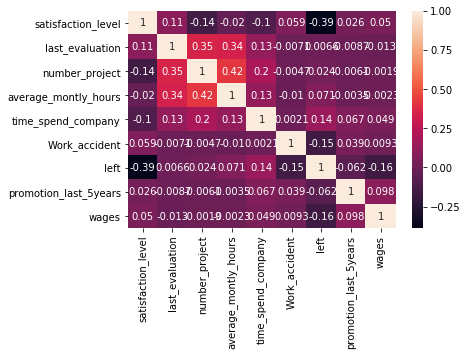

In [10]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [11]:
# 4. Визуализировать несколько взаимосвязей между переменными




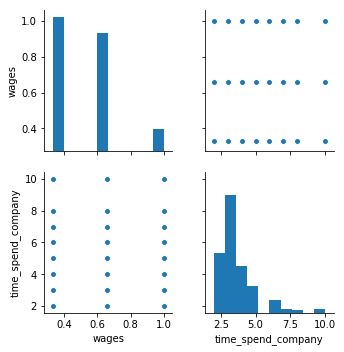

In [12]:
sns.pairplot(data, vars=['wages', 'time_spend_company'],
                 kind='scatter')

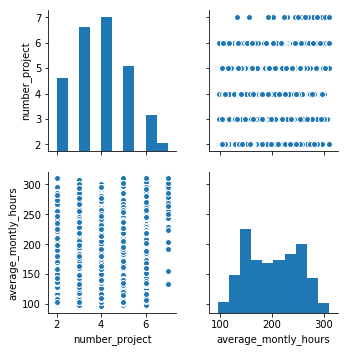

In [13]:
sns.pairplot(data, vars=['number_project', 'average_montly_hours'],
                 kind='scatter')

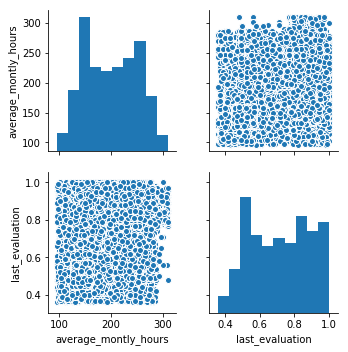

In [14]:
sns.pairplot(data, vars=['average_montly_hours', 'last_evaluation'],
                 kind='scatter')

In [15]:
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными





In [16]:
stats.ttest_ind(data['wages'], data['time_spend_company'])

Ttest_indResult(statistic=-246.62034689384873, pvalue=0.0)

In [17]:
stats.ttest_1samp(data['number_project'] - data['Work_accident'], 0)

Ttest_1sampResult(statistic=349.11422767656904, pvalue=0.0)

In [18]:
stats.ttest_rel(data['average_montly_hours'], data['last_evaluation'])

Ttest_relResult(statistic=491.8294792074422, pvalue=0.0)

In [19]:
# 6. Рассчитать сколько работников работает в каждом департаменте




In [20]:
data.groupby('sales').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,wages
sales,,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [21]:
# 7. Показать распределение сотрудников по зарплатам




In [22]:
data.groupby('salary').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,wages
salary,,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [23]:
# 8. Показать распределение сотрудников по зарплатам совместно с департаментами




In [24]:
data.pivot_table(index = 'sales', columns = 'salary', values = 'average_montly_hours', aggfunc = 'count', fill_value = 0)

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [25]:
# 9. Сколько сотрудников покинули компанию




In [26]:
data[data['left'] == 1].count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
wages                    3571
dtype: int64

In [27]:
# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию




In [28]:
# проверка зависимости ухода от заработной платы


noleft_w = data[data['left'] == 0]['wages']
left_w = data[data['left'] == 1]['wages']

stats.ttest_ind(noleft_w, left_w) 

Ttest_indResult(statistic=19.608469862366842, pvalue=1.4955209416230305e-84)

In [29]:
data.pivot_table(index = 'wages', columns = 'left', values = 'average_montly_hours', aggfunc = 'count', fill_value = 0)

left,0,1
wages,,
0.33,5144,2172
0.66,5129,1317
1.00,1155,82


In [32]:
# проверка зависимости ухода от удовлетворенности работы

noleft_s = data[data['left'] == 0]['satisfaction_level']
left_s = data[data['left'] == 1]['satisfaction_level']

stats.ttest_ind(noleft_s, left_s)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [33]:
# проверка зависимости ухода от времени проведенного на работе

noleft_a = data[data['left'] == 0]['average_montly_hours']
left_a = data[data['left'] == 1]['average_montly_hours']

stats.ttest_ind(noleft_a, left_a)

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)